In [1]:
!pip install h5py

     |████████████████████████████████| 4.5 MB 11.5 MB/s eta 0:00:01


In [2]:
import torch 
import numpy as np
from PIL import Image
from torchvision import transforms
import h5py
import matplotlib.pyplot as plt
import random
from torch.utils.data import Dataset, DataLoader, random_split
import torch.nn as nn
import torch.optim as optim
import os

In [3]:
from collections import OrderedDict

import torch
import torch.nn as nn


class UNet(nn.Module):

    def __init__(self, in_channels=3, out_channels=4, init_features=32):
        super(UNet, self).__init__()

        features = init_features
        self.encoder1 = UNet._block(in_channels, features, name="enc1")
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.encoder2 = UNet._block(features, features * 2, name="enc2")
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.encoder3 = UNet._block(features * 2, features * 4, name="enc3")
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.encoder4 = UNet._block(features * 4, features * 8, name="enc4")
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.bottleneck = UNet._block(features * 8, features * 16, name="bottleneck")

        self.upconv4 = nn.ConvTranspose2d(
            features * 16, features * 8, kernel_size=2, stride=2
        )
        self.decoder4 = UNet._block((features * 8) * 2, features * 8, name="dec4")
        self.upconv3 = nn.ConvTranspose2d(
            features * 8, features * 4, kernel_size=2, stride=2
        )
        self.decoder3 = UNet._block((features * 4) * 2, features * 4, name="dec3")
        self.upconv2 = nn.ConvTranspose2d(
            features * 4, features * 2, kernel_size=2, stride=2
        )
        self.decoder2 = UNet._block((features * 2) * 2, features * 2, name="dec2")
        self.upconv1 = nn.ConvTranspose2d(
            features * 2, features, kernel_size=2, stride=2
        )
        self.decoder1 = UNet._block(features * 2, features, name="dec1")

        self.conv = nn.Conv2d(
            in_channels=features, out_channels=out_channels, kernel_size=1
        )

    def forward(self, x):
        enc1 = self.encoder1(x)
        enc2 = self.encoder2(self.pool1(enc1))
        enc3 = self.encoder3(self.pool2(enc2))
        enc4 = self.encoder4(self.pool3(enc3))

        bottleneck = self.bottleneck(self.pool4(enc4))

        dec4 = self.upconv4(bottleneck)
        dec4 = torch.cat((dec4, enc4), dim=1)
        dec4 = self.decoder4(dec4)
        dec3 = self.upconv3(dec4)
        dec3 = torch.cat((dec3, enc3), dim=1)
        dec3 = self.decoder3(dec3)
        dec2 = self.upconv2(dec3)
        dec2 = torch.cat((dec2, enc2), dim=1)
        dec2 = self.decoder2(dec2)
        dec1 = self.upconv1(dec2)
        dec1 = torch.cat((dec1, enc1), dim=1)
        dec1 = self.decoder1(dec1)
        
        return torch.sigmoid(self.conv(dec1))

    @staticmethod
    def _block(in_channels, features, name):
        return nn.Sequential(
            OrderedDict(
                [
                    (
                        name + "conv1",
                        nn.Conv2d(
                            in_channels=in_channels,
                            out_channels=features,
                            kernel_size=3,
                            padding=1,
                            bias=False,
                        ),
                    ),
                    (name + "norm1", nn.BatchNorm2d(num_features=features)),
                    (name + "relu1", nn.ReLU(inplace=True)),
                    (
                        name + "conv2",
                        nn.Conv2d(
                            in_channels=features,
                            out_channels=features,
                            kernel_size=3,
                            padding=1,
                            bias=False,
                        ),
                    ),
                    (name + "norm2", nn.BatchNorm2d(num_features=features)),
                    (name + "relu2", nn.ReLU(inplace=True)),
                ]
            )
        )

In [ ]:
net.to(cuda_device)

UNet(
  (encoder1): Sequential(
    (enc1conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu1): ReLU(inplace=True)
    (enc1conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc1norm2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc1relu2): ReLU(inplace=True)
  )
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (encoder2): Sequential(
    (enc2conv1): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (enc2relu1): ReLU(inplace=True)
    (enc2conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (enc2norm2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, tra

In [ ]:
cuda_device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(cuda_device)

cuda


In [ ]:
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-05)

In [ ]:
t_losses = []
v_losses = []

In [ ]:
folder = 'test1/'
os.mkdir(folder)

FileExistsError: ignored

In [ ]:
import time 
start = time.time()

beg = 0
end = 100

# if not os.path.exists(folder):
#     t_losses = []
#     v_losses = []
# else:
#     t_losses = np.loadtxt(folder + 't_losses.txt', delimiter=',')
#     v_losses = np.loadtxt(folder + 'v_losses.txt', delimiter=',')

for epoch in range(beg, end):  # loop over the dataset multiple times
    print(epoch)
    print(str(time.time() - start) + ' seconds have passed')
    
    path = folder + str(epoch) + '.pth'
    new = True
    if os.path.exists(path):
        net.load_state_dict(torch.load(path))
        new = False
    else:
        print('creating ' + path)
    
    t_loss = 0
    t_count = 0
    v_loss = 0
    v_count = 0
    for i, data in enumerate(nyu_train):
        # get the inputs; data is a list of [inputs, labels]
        inputs, depths = data
        inputs, depths = inputs.to(cuda_device), depths.to(cuda_device)

        if new:
            # zero the parameter gradients
            optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, depths)
        
        if new: 
            loss.backward()
            optimizer.step()

        t_loss += loss.detach().cpu().numpy()
        t_count += 1
    if epoch >= len(t_losses):
        t_losses.append([0])
    t_losses[epoch] = t_loss/t_count
    
    for i, data in enumerate(nyu_val):
        inputs, depths = data
        inputs, depths = inputs.to(cuda_device), depths.to(cuda_device)
        
        outputs = net(inputs)
        loss = criterion(outputs, depths)
        
        v_loss += loss.detach().cpu().numpy()
        v_count += 1
    if epoch >= len(v_losses):
        v_losses.append([0])
    v_losses[epoch] = v_loss/v_count
    print('validation loss:', v_loss/v_count)
    
    torch.save(net.state_dict(), path)

print('Finished Training')
print('Took ' + str((time.time() - start)/60) + ' minutes')

0
0.0004069805145263672 seconds have passed
creating test1/0.pth
validation loss: 5.045575203960889
1
124.80121755599976 seconds have passed
creating test1/1.pth
validation loss: 5.033679953176681
2
257.0098695755005 seconds have passed
creating test1/2.pth
validation loss: 5.051197448821917
3
389.3965401649475 seconds have passed
creating test1/3.pth
validation loss: 5.019236014313893
4
521.7518222332001 seconds have passed
creating test1/4.pth
validation loss: 5.0681704821651925
5
654.0307619571686 seconds have passed
creating test1/5.pth
validation loss: 5.013479650837102
6
786.3195731639862 seconds have passed
creating test1/6.pth
validation loss: 5.105839188784769
7
918.6307651996613 seconds have passed
creating test1/7.pth
validation loss: 5.043568489486224
8
1050.9152693748474 seconds have passed
creating test1/8.pth
validation loss: 5.034535386790968
9
1183.2692708969116 seconds have passed
creating test1/9.pth
validation loss: 5.023528079464011
10
1315.5202684402466 seconds ha

In [ ]:
class UnNormalize(object):
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std

    def __call__(self, tensor):
        """
        Args:
            tensor (Tensor): Tensor image of size (C, H, W) to be normalized.
        Returns:
            Tensor: Normalized image.
        """
        for t, m, s in zip(tensor, self.mean, self.std):
            t.mul_(s).add_(m)
            # The normalize code -> t.sub_(m).div_(s)
        return tensor

In [ ]:
def imshow(img, m, s):
    # unorm = UnNormalize(mean=m, std=s)
    # img = unorm(img)
    r = img.shape[-2]
    c = img.shape[-1]
    img = img.cpu().numpy().reshape(r, c)
    plt.imshow(img)

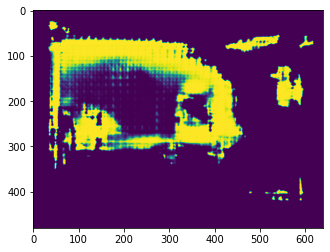

In [ ]:
imshow(output, m, s)

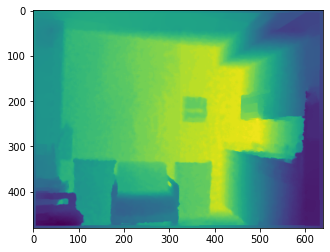

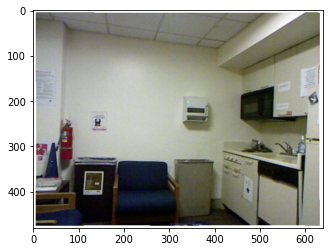

In [ ]:
plt.imshow(depths[0])
plt.show()

plt.imshow(images[0])
plt.show()